In [1]:
import sys
sys.path.insert(0, '../')
from bibliotecas import base_estudantes, job, magalu, alunos, petrobras, sns, np, pd, plt, yf, px, go, sp, wn, quandl, date, db
wn.filterwarnings('ignore')

In [2]:
df = pd.read_excel('./Dados/Base_Dados - Estudo Combustiveis.xlsx')
preco = pd.read_csv('./Dados/Dados Preco Combutivel.csv', sep=',')

In [3]:
preco['Data'] = pd.to_datetime(preco['Data'])

<AxesSubplot:xlabel='Data', ylabel='Valor_Venda'>

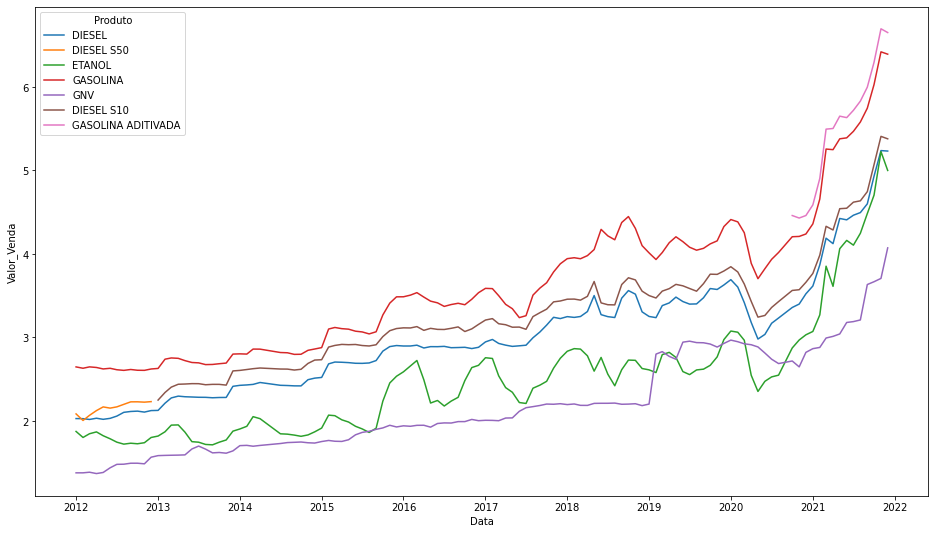

In [4]:
plt.figure(figsize=(16,9))
sns.lineplot(data=preco, x='Data', y='Valor_Venda', hue='Produto')

In [5]:
preco.groupby('Produto').describe().T

Produto                 DIESEL   DIESEL S10   DIESEL S50       ETANOL  \
Ano         count   117.000000   105.000000    12.000000   117.000000   
            mean   2016.512821  2017.028571  2012.000000  2016.512821   
            std       2.884607     2.581209     0.000000     2.884607   
            min    2012.000000  2013.000000  2012.000000  2012.000000   
            25%    2014.000000  2015.000000  2012.000000  2014.000000   
            50%    2017.000000  2017.000000  2012.000000  2017.000000   
            75%    2019.000000  2019.000000  2012.000000  2019.000000   
            max    2021.000000  2021.000000  2012.000000  2021.000000   
Mes         count   117.000000   105.000000    12.000000   117.000000   
            mean      6.495726     6.495238     6.500000     6.495726   
            std       3.500305     3.505830     3.605551     3.500305   
            min       1.000000     1.000000     1.000000     1.000000   
            25%       3.000000     3.000000     3.750000     3.000000   
            50%       7.000000     7.000000     6.500000     7.000000   
            75%      10.000000    10.000000     9.250000    10.000000   
            max      12.000000    12.000000    12.000000    12.000000   
Valor_Venda count   117.000000   105.000000    12.000000   117.000000   
            mean      3.005245     3.301452     2.156385     2.489714   
            std       0.692166     0.639080     0.073805     0.715070   
            min       2.017308     2.249364     2.005000     1.713138   
            25%       2.430653     2.903975     2.113351     1.903143   
            50%       2.902562     3.225003     2.167663     2.473996   
            75%       3.398895     3.585748     2.225344     2.750211   
            max       5.237843     5.408147     2.230807     5.225106   

Produto               GASOLINA  GASOLINA ADITIVADA          GNV  
Ano         count   117.000000           15.000000   117.000000  
            mean   2016.512821         2020.800000  2016.512821  
            std       2.884607            0.414039     2.884607  
            min    2012.000000         2020.000000  2012.000000  
            25%    2014.000000         2021.000000  2014.000000  
            50%    2017.000000         2021.000000  2017.000000  
            75%    2019.000000         2021.000000  2019.000000  
            max    2021.000000         2021.000000  2021.000000  
Mes         count   117.000000           15.000000   117.000000  
            mean      6.495726            7.400000     6.495726  
            std       3.500305            3.718679     3.500305  
            min       1.000000            1.000000     1.000000  
            25%       3.000000            4.500000     3.000000  
            50%       7.000000            8.000000     7.000000  
            75%      10.000000           10.500000    10.000000  
            max      12.000000           12.000000    12.000000  
Valor_Venda count   117.000000           15.000000   117.000000  
            mean      3.621738            5.487613     2.186228  
            std       0.871627            0.771367     0.594437  
            min       2.605125            4.429939     1.369044  
            25%       2.818931            4.745925     1.734494  
            50%       3.486603            5.632704     2.006067  
            75%       4.120173            5.914053     2.738750  
            max       6.420732            6.696749     4.072493

In [6]:
preco.groupby('Produto')['Valor_Venda'].agg([np.mean, np.min, np.max, np.std]).T

Produto,DIESEL,DIESEL S10,DIESEL S50,ETANOL,GASOLINA,GASOLINA ADITIVADA,GNV
mean,3.005245,3.301452,2.156385,2.489714,3.621738,5.487613,2.186228
amin,2.017308,2.249364,2.005000,1.713138,2.605125,4.429939,1.369044
amax,5.237843,5.408147,2.230807,5.225106,6.420732,6.696749,4.072493
std,0.692166,0.639080,0.073805,0.715070,0.871627,0.771367,0.594437


<AxesSubplot:xlabel='Produto', ylabel='Valor_Venda'>

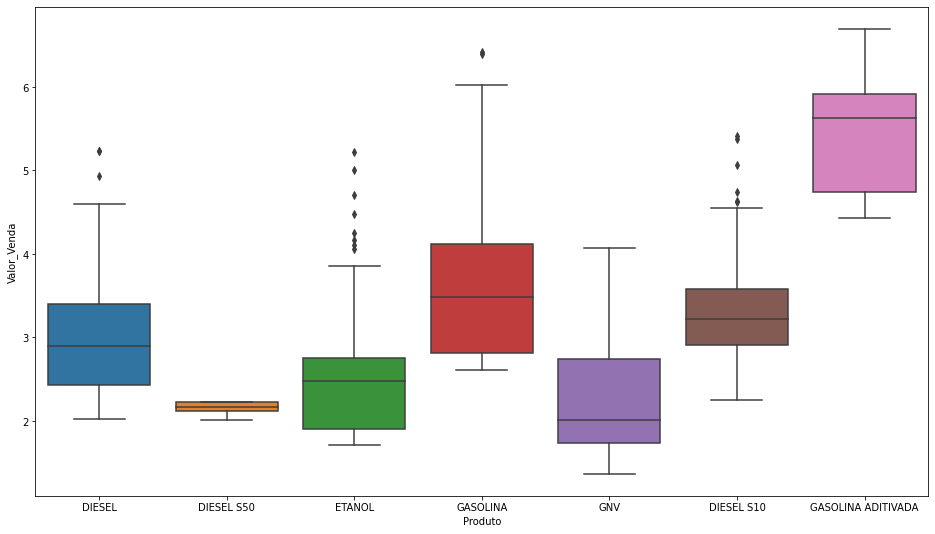

In [7]:
plt.figure(figsize=(16,9))
sns.boxplot(data=preco, x='Produto', y='Valor_Venda')

<AxesSubplot:xlabel='Ano', ylabel='Valor_Venda'>

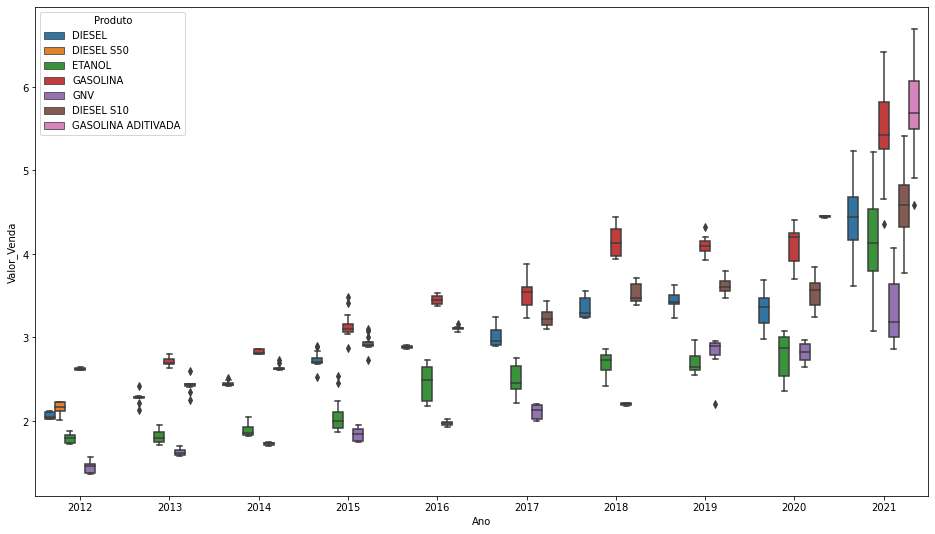

In [8]:
plt.figure(figsize=(16,9))
sns.boxplot(data=preco, x='Ano', y='Valor_Venda', hue='Produto')

In [9]:
preco.groupby('Produto').corr()

Ano       Mes  Valor_Venda
Produto                                                        
DIESEL             Ano          1.000000 -0.011734     0.913587
                   Mes         -0.011734  1.000000     0.121111
                   Valor_Venda  0.913587  0.121111     1.000000
DIESEL S10         Ano          1.000000 -0.014329     0.896482
                   Mes         -0.014329  1.000000     0.135587
                   Valor_Venda  0.896482  0.135587     1.000000
DIESEL S50         Ano               NaN       NaN          NaN
                   Mes               NaN  1.000000     0.915553
                   Valor_Venda       NaN  0.915553     1.000000
ETANOL             Ano          1.000000 -0.011734     0.831734
                   Mes         -0.011734  1.000000     0.067989
                   Valor_Venda  0.831734  0.067989     1.000000
GASOLINA           Ano          1.000000 -0.011734     0.906985
                   Mes         -0.011734  1.000000     0.101152
                   Valor_Venda  0.906985  0.101152     1.000000
GASOLINA ADITIVADA Ano          1.000000 -0.501032     0.696189
                   Mes         -0.501032  1.000000     0.243161
                   Valor_Venda  0.696189  0.243161     1.000000
GNV                Ano          1.000000 -0.011734     0.933839
                   Mes         -0.011734  1.000000     0.103179
                   Valor_Venda  0.933839  0.103179     1.000000

In [10]:
list(preco.Produto.unique())

['DIESEL',
 'DIESEL S50',
 'ETANOL',
 'GASOLINA',
 'GNV',
 'DIESEL S10',
 'GASOLINA ADITIVADA']

In [11]:
liq = ['DIESEL', 'ETANOL', 'GASOLINA']

In [12]:
dados = []
for i in liq:
    dados.append(preco[preco['Produto']==i]['Valor_Venda'].values)

In [13]:
dicio = {}
for i,n in enumerate(liq):
    dicio[n] = dados[i]

In [14]:
combustivel = pd.DataFrame(dicio)

In [15]:
combustivel

,DIESEL,ETANOL,GASOLINA
0,2.027764,1.873515,2.646635
1,2.026552,1.801496,2.630560
2,2.017308,1.846093,2.646948
3,2.031818,1.868127,2.639803
4,2.018845,1.822196,2.622173
...,...,...,...
112,4.495195,4.247120,5.580113
113,4.599753,4.483152,5.745652
114,4.931493,4.703966,6.028443
115,5.237843,5.225106,6.420732


In [16]:
combustivel.corr()

,DIESEL,ETANOL,GASOLINA
DIESEL,1.000000,0.960079,0.989928
ETANOL,0.960079,1.000000,0.969224
GASOLINA,0.989928,0.969224,1.000000


<AxesSubplot:xlabel='GASOLINA', ylabel='ETANOL'>

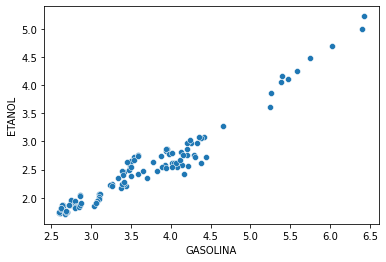

In [17]:
sns.scatterplot(data=combustivel, x='GASOLINA', y='ETANOL')

In [18]:
[i.capitalize() for i in liq]

['Diesel', 'Etanol', 'Gasolina']